### Useful links 
***
#### installation & documentation stuff
* [Python & Jupyter installation](https://canvas.ucsc.edu/courses/62112/files?preview=7130765): This is the same file that's in Canvas 
* [Astropy Installation](https://docs.astropy.org/en/stable/install.html)
* [Astroquery Installation](https://astroquery.readthedocs.io/en/latest/index.html)
* [Pandas Installation](https://pandas.pydata.org/docs/getting_started/install.html)
* [astroquery.gaia Documentation](https://astroquery.readthedocs.io/en/latest/gaia/gaia.html)
#### documentation, tutorials, help pages etc
* [Gaia DR2 documentation](https://www.cosmos.esa.int/web/gaia-users/archive/gdr2-documentation): All things Gaia DR2.
* [Column descriptions](https://gea.esac.esa.int/archive/documentation/GEDR3/Gaia_archive/chap_datamodel/sec_dm_main_tables/ssec_dm_gaia_source.html): A description of the columns in the Gaia tables.
* [Query examples](https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries#ADQLQueryExamples): In case you want to look at some ADQL query examples.
* [Main archive help page](https://www.cosmos.esa.int/web/gaia-users/archive): Your main help page.
* [ADQL syntax](https://www.cosmos.esa.int/web/gaia-users/archive/writing-queries#ADQLsyntaxTutorial): ADQL nuances.
#### other tools
* [Simbad](http://simbad.cds.unistra.fr/simbad/sim-id?Ident=ngc+6397&NbIdent=1&Radius=2&Radius.unit=arcmin&submit=submit+id): Useful for looking up astronomical objects




=============================================================================================================

## Getting Started:

This tutorial will walk you through the basics of retrieving data from Gaia & plotting it. By the end of this tutorial, you will be able to plot an HR diagram of the cluster NGC 6397 (we spent some time talking about it in class today). Since this tutorial is meant just show you the basics, your HR diagram will be a preliminary plot, rather than the final/most correct answer. I will be giving you questions to chew on throughout the tutorial in order to help you think about what more you can do or consider in order to improve your final result.

#### Before you start:
There are two main methods to retrieve data from Gaia:
1) using the astroquery.gaia package in python
2) submitting a query to the Gaia archive website https://gea.esac.esa.int/archive/
    - if you plan on using the website, it will make your life much easier to first create an account
    - this allows you to save your queries & results
    - go to the 'sign in' link at the very top right corner to create an account
    
    
Note: Since the second method is more straight-forward & less buggy, I will walk you through using the Gaia archive website. If you are really interested in using astroquery, start by looking at the documentation sites for it. You are also welcome to email me with questions. 

### [START] 1. Importing Stuff

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from astropy import units as u
from astropy import constants as c


### 2. Submitting your query
1. Go to the 'Search' bar in the Gaia archive, and under 'Basic' enter a cone search for NGC 6397 with a radius of 50 arcmin. Pick the columns that will be relevant for an HR Diagram
2. Pick 'gaiadr2.gaia_source' in the drop-down menu next to 'Search in:'
2. Then switch over to the 'Advanced (ADQL)' tab to make sure you are selecting all the stars in the cone (delete 'TOP 2000')
3. Submit your query then download the results as a csv & put the file in the same directory as this notebook
4. Read in your results (next cell)

In [10]:
#### GAIA ARCHIVE WEBSITE ####
# query_result = pd.read_csv('ngc_6397_dr2-result.csv') #change filename, if needed

query_result = pd.read_csv('gaia_dr2_result.csv')

#### Questions to consider:
1. Why is the radius of the cone search 50 arcmin?
2. Which columns are relevant and which ones can you do without?
3. What is different between the data releases in Gaia (DR2, DR3)?

### 3. Examining your data
It is *always* best practice to examine your data first to make sure it looks like what you are expecting. This will save you time & energy if you need to debug later on.

In [11]:
query_result

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,teff_val,lum_val
0,6790995477169966848,320.460572,-26.221887,23.916346,0.059848,12.262900,2.052661,4029.0000,NaN
1,4415215217669031680,229.238223,-1.258608,21.651875,0.042970,14.166832,2.216067,4090.5176,NaN
2,6350283492745097728,355.984772,-82.508895,25.065893,0.026521,7.526386,0.791476,5890.2500,1.149332
3,6350264560529125248,358.934175,-82.598396,38.310702,0.049651,13.576039,2.850444,3684.7650,NaN
4,4154791250114009472,279.038968,-10.891548,28.605198,0.055018,8.330505,0.890158,5540.0000,0.431254
...,...,...,...,...,...,...,...,...,...
6685,3239548665775613056,73.983450,4.669605,27.744111,0.041548,6.872698,0.726541,6068.0000,1.700833
6686,3239594295507919488,73.455654,4.894998,30.260269,0.044709,14.100830,2.707630,3776.3200,NaN
6687,2444725728828338304,0.831112,-4.567607,21.609873,0.072837,14.114411,2.602921,3678.6200,NaN
6688,2444686180769411840,0.242600,-4.933282,22.071722,0.080841,8.406075,0.838324,5713.0000,0.666158


From the above cell, it looks like the lum_val column has a lot of Nan values. These will need to be filtered out, since the stars with invalid luminosity values cannot really go on the HR diagram. 

In [12]:
#this creates a new dataframe containing only those stars with valid luminosity values
query_result_filtered = query_result.dropna(subset=['lum_val'])
query_result_filtered

,source_id,ra,dec,parallax,parallax_error,phot_g_mean_mag,bp_rp,teff_val,lum_val
2,6350283492745097728,355.984772,-82.508895,25.065893,0.026521,7.526386,0.791476,5890.2500,1.149332
4,4154791250114009472,279.038968,-10.891548,28.605198,0.055018,8.330505,0.890158,5540.0000,0.431254
5,5519593520133411584,122.789559,-46.297448,24.865354,0.032165,8.584497,1.032911,5199.0000,0.471656
10,853819947756949120,157.655218,55.980398,77.434645,0.167988,4.637458,0.697404,6183.3335,1.705506
14,77161217776670208,32.717508,13.682968,23.315291,0.060883,8.015975,0.833550,5709.0000,0.855321
...,...,...,...,...,...,...,...,...,...
6680,5114240352186781952,55.774785,-12.894209,35.218015,0.062085,10.269168,1.705475,4171.8467,0.070418
6682,4464207428577214464,243.327612,13.526227,41.259192,0.035166,7.247616,0.942830,5462.6665,0.566429
6683,4464207428579939840,243.327666,13.525093,41.151008,0.041274,7.166324,0.924380,5449.7500,0.614549
6685,3239548665775613056,73.983450,4.669605,27.744111,0.041548,6.872698,0.726541,6068.0000,1.700833


### 4. Plotting the data
Plotting data is a multi-step process. 
1. Start by creating arrays to hold the quantities you care about
2. Create a scatter plot with luminosity on the y-axis & temperature on the x-axis
3. For large datasets, you will usually need to change marker sizes & opacities in order to visualize patterns in the data properly
4. You might also need to change the scaling & limits
4. Make sure to label your axes 

In [13]:
luminosities = query_result_filtered['lum_val']
temperatures = query_result_filtered['teff_val']

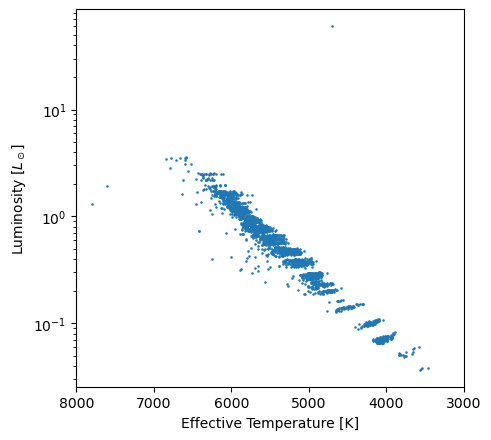

In [14]:
fig, ax = plt.subplots(figsize=(5,5), dpi=100)

ax.scatter(temperatures,luminosities, s=0.7)

ax.set_xlim(8000,3000)

ax.set_yscale('log')

ax.set_ylabel(r'Luminosity [$L_\odot$]')
ax.set_xlabel('Effective Temperature [K]')

plt.show()

#### Questions to consider:
1. Why is the x-axis reversed? Why is the y-axis in log scale?  
2. Where did the units for the axes come from? 
3. Does the HR diagram above look like what you expect? If not, what other filtering steps do you need to do to your dataset?